In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("stocks.csv")

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
df.shape

(248, 8)

##1. check missing value

In [ ]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## 2. check the duplicates

In [ ]:
df.duplicated().sum()

0

## There are no duplicates  values in the data set

##3. check data types

In [ ]:
df.dtypes

,0
Ticker,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


## 4 Checking the number of unique values of each column

In [ ]:
df.nunique()

,0
Ticker,4
Date,62
Open,244
High,248
Low,248
Close,244
Adj Close,244
Volume,248


## 5. Check statistics of data set

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


## 6. Exploring Data

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

We have 2 categorical features : ['Ticker', 'Date']


## 7. Adding columns for "moving average","Daily return","Volatility"

In [ ]:
df['MA_10']=df['Close'].rolling(window=10).mean()
df['MA_20']=df['Close'].rolling(window=20).mean()
df['MA_50']=df['Close'].rolling(window=50).mean()

df['Daily_Return']=df['Close'].pct_change()*100

df['Volatility']=df['Daily_Return'].rolling(window=10).std() # volatility=standard deviation of daily return

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN,NaN,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,NaN,NaN,NaN,-1.765274,NaN
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,NaN,NaN,NaN,-0.691155,NaN
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,NaN,NaN,NaN,0.092795,NaN
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,NaN,NaN,1.880678,NaN


In [ ]:
df.MA_50.isnull().sum()

49

In [ ]:
df['MA_10']=df['MA_10'].fillna(df['MA_10'].mean())

In [ ]:
df['MA_20']=df['MA_20'].fillna(df['MA_20'].mean())

In [ ]:
df['MA_50']=df['MA_50'].fillna(df['MA_50'].mean())

In [ ]:
df.Daily_Return.isnull().sum()

1

In [ ]:
df['Daily_Return']=df['Daily_Return'].fillna(df['Daily_Return'].mean())

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,218.612048,222.554124,236.678966,0.088547,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,218.612048,222.554124,236.678966,-1.765274,NaN
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,218.612048,222.554124,236.678966,-0.691155,NaN
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,218.612048,222.554124,236.678966,0.092795,NaN
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,218.612048,222.554124,236.678966,1.880678,NaN


In [ ]:
df.Volatility.isnull().sum()

10

In [ ]:
df['Volatility']=df['Volatility'].fillna(df['Volatility'].mean())

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,218.612048,222.554124,236.678966,0.088547,3.372676
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,218.612048,222.554124,236.678966,-1.765274,3.372676
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,218.612048,222.554124,236.678966,-0.691155,3.372676
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,218.612048,222.554124,236.678966,0.092795,3.372676
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,218.612048,222.554124,236.678966,1.880678,3.372676


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df.head(2)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility,Day,Month,Year
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.41423,83322600,218.612048,222.554124,236.678966,0.088547,3.372676,7,2,2023
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.68840,64120100,218.612048,222.554124,236.678966,-1.765274,3.372676,8,2,2023


## 8. Visuliazation

<Axes: xlabel='Volatility', ylabel='Count'>

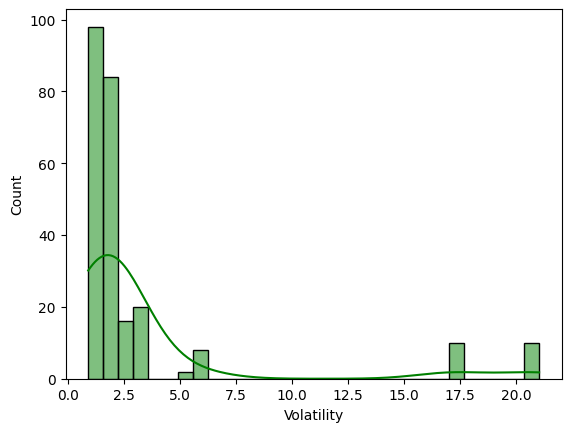

In [ ]:
sns.histplot(data=df,x='Volatility',bins=30,kde=True,color='g')

<Axes: xlabel='Daily_Return', ylabel='Adj Close'>

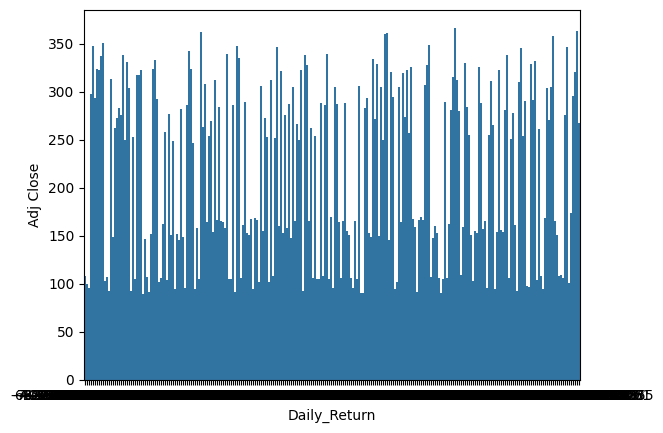

In [ ]:
sns.barplot(data=df,x='Daily_Return',y='Adj Close')

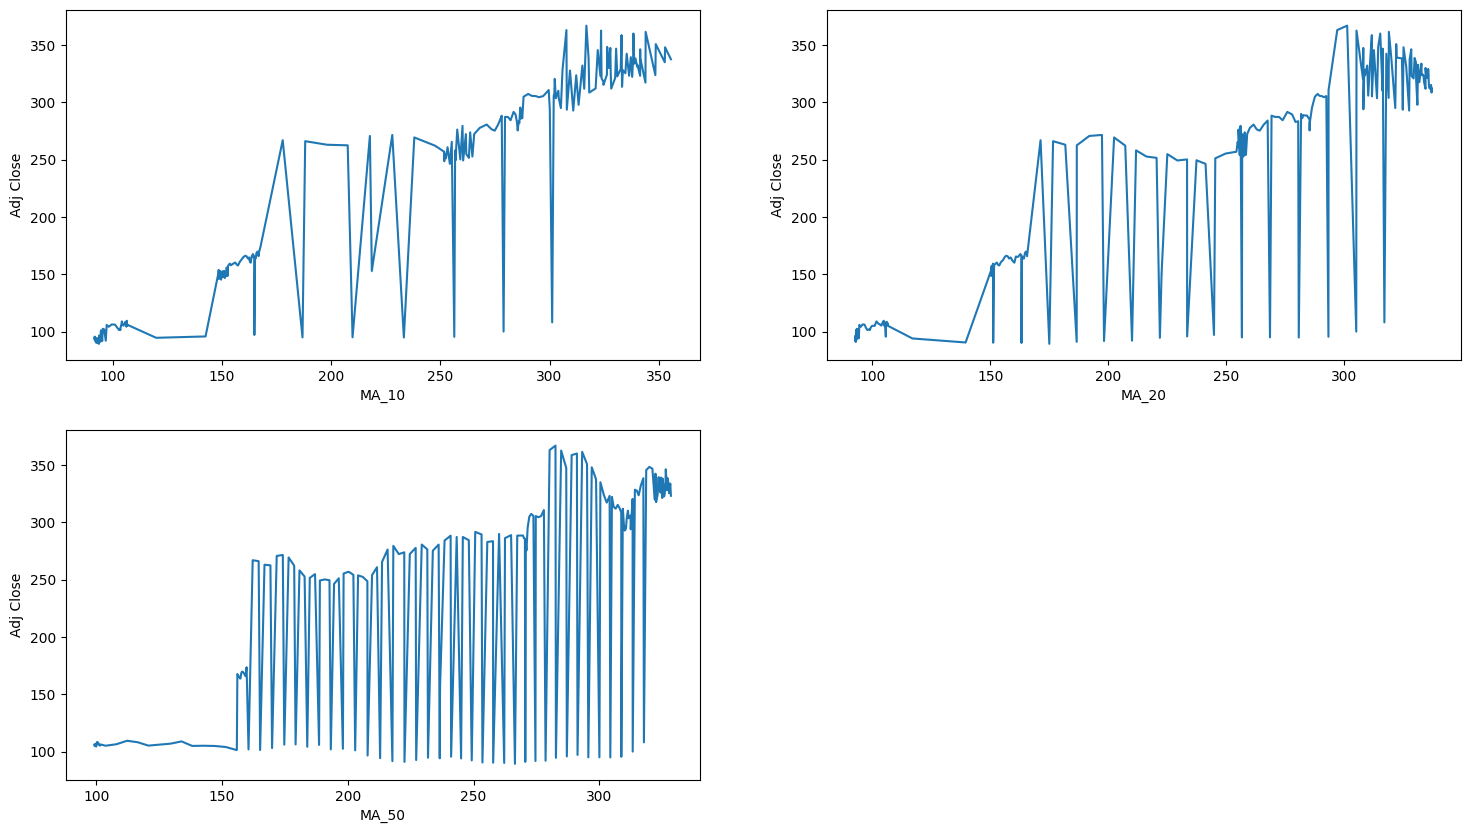

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.lineplot(data=df,x='MA_10',y='Adj Close')
plt.subplot(2,2,2)
sns.lineplot(data=df,x='MA_20',y='Adj Close')
plt.subplot(2,2,3)
sns.lineplot(data=df,x='MA_50',y='Adj Close')
plt.show()

<Axes: xlabel='Volatility', ylabel='Adj Close'>

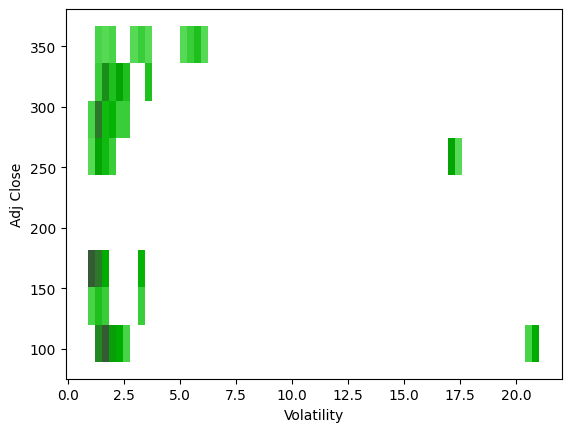

In [ ]:
sns.histplot(data=df,x='Volatility',y='Adj Close',color='g')

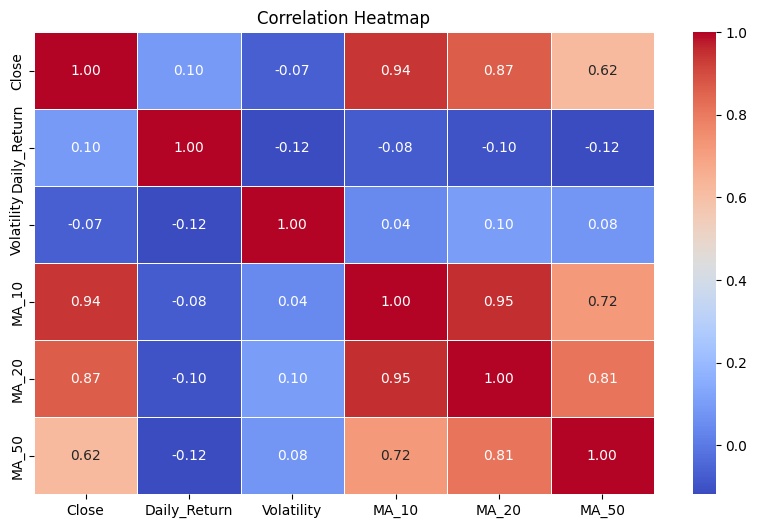

In [ ]:
#se a heatmap or scatter plot matrix to visualize correlations between Close, Daily_Return, Volatility, and the moving averages.

import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = df[['Close', 'Daily_Return', 'Volatility', 'MA_10', 'MA_20', 'MA_50']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='Month'>

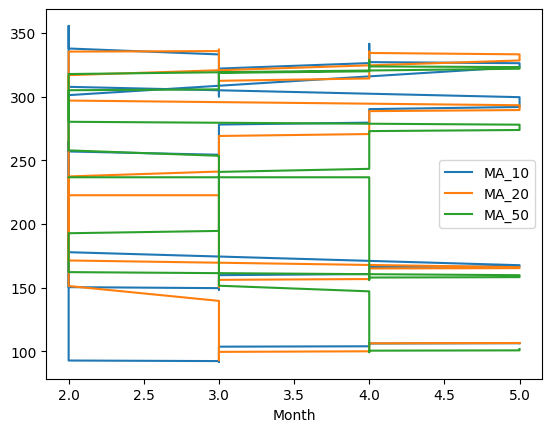

In [ ]:
# moving average in particular day wise

df.plot(x='Month',y=['MA_10','MA_20','MA_50'])

In [ ]:
df.head(1)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility,Day,Month,Year
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.41423,83322600,218.612048,222.554124,236.678966,0.088547,3.372676,7,2,2023


<Axes: xlabel='Daily_Return', ylabel='Adj Close'>

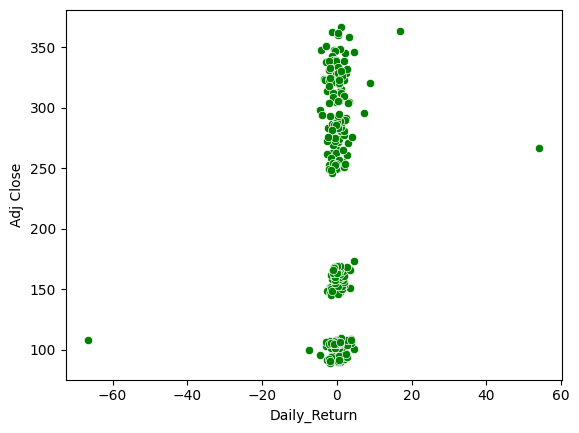

In [ ]:
sns.scatterplot(data=df,x='Daily_Return',y='Adj Close',color='green')

<Axes: xlabel='Volume', ylabel='Adj Close'>

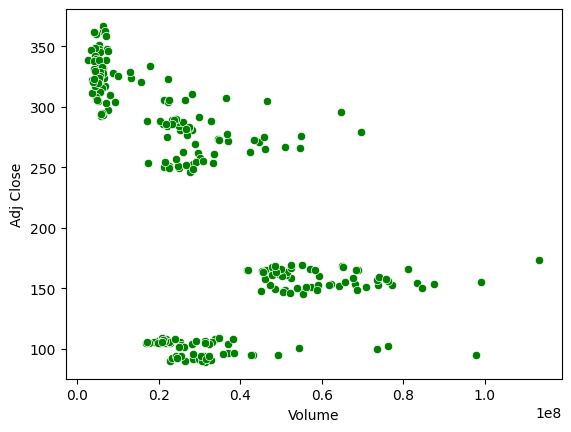

In [ ]:
sns.scatterplot(data=df,x='Volume',y='Adj Close',color='green')

<Axes: xlabel='Low', ylabel='Adj Close'>

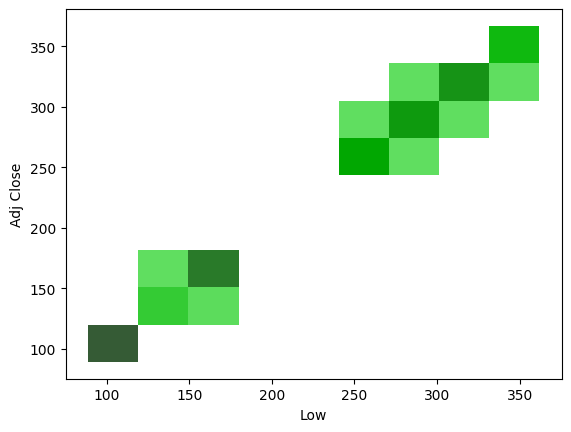

In [ ]:
# how much stock being low ccording to previous close

sns.histplot(data=df,x='Low',y='Adj Close',color='green')

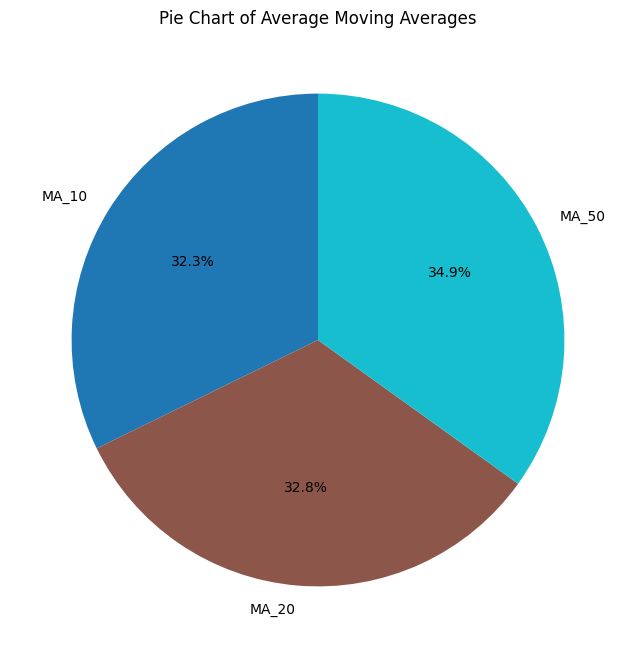

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average of each moving average column
ma_avg = df[['MA_10', 'MA_20', 'MA_50']].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
ma_avg.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab10', legend=False)
plt.title('Pie Chart of Average Moving Averages')
plt.ylabel('')  # Remove y-label for better aesthetics
plt.show()


In [ ]:
df.head(1)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Daily_Return,Volatility,Day,Month,Year
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.41423,83322600,218.612048,222.554124,236.678966,0.088547,3.372676,7,2,2023


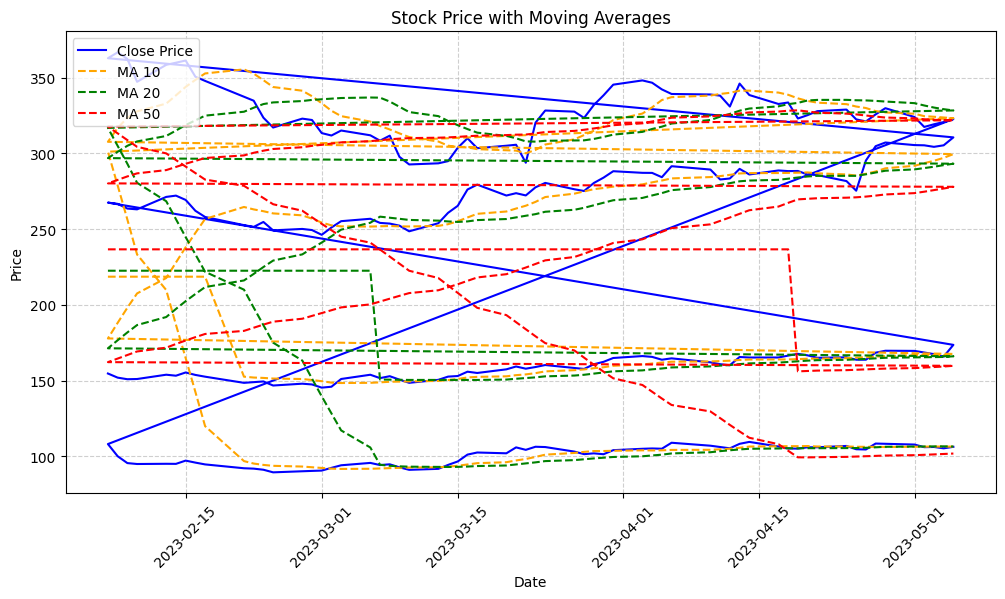

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date' is in datetime format
plt.figure(figsize=(12, 6))  # Larger figure size

# Plotting lines with distinct styles
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_10'], label='MA 10', color='orange', linestyle='--')
plt.plot(df['Date'], df['MA_20'], label='MA 20', color='green', linestyle='--')
plt.plot(df['Date'], df['MA_50'], label='MA 50', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')

# Formatting x-axis for better readability
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend
plt.legend(loc='upper left')

# Displaying the chart
plt.show()


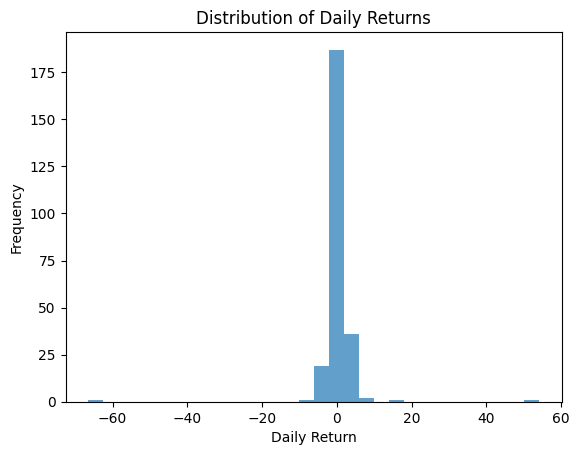

In [ ]:
plt.hist(df['Daily_Return'], bins=30, alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

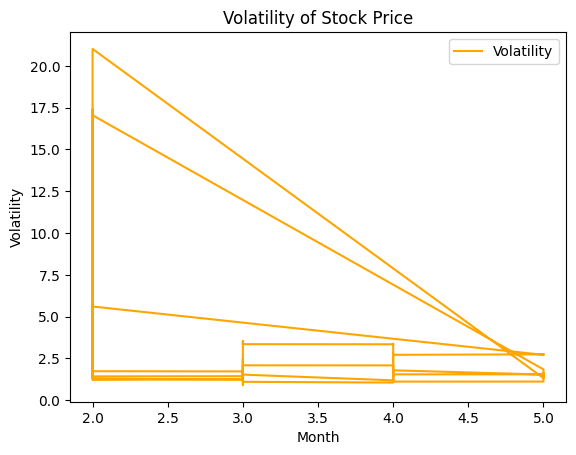

In [ ]:
plt.plot(df['Month'], df['Volatility'], label='Volatility', color='orange')
plt.xlabel('Month')
plt.ylabel('Volatility')
plt.title('Volatility of Stock Price')
plt.legend()
plt.show()

In [ ]:
!pip install mplfinance

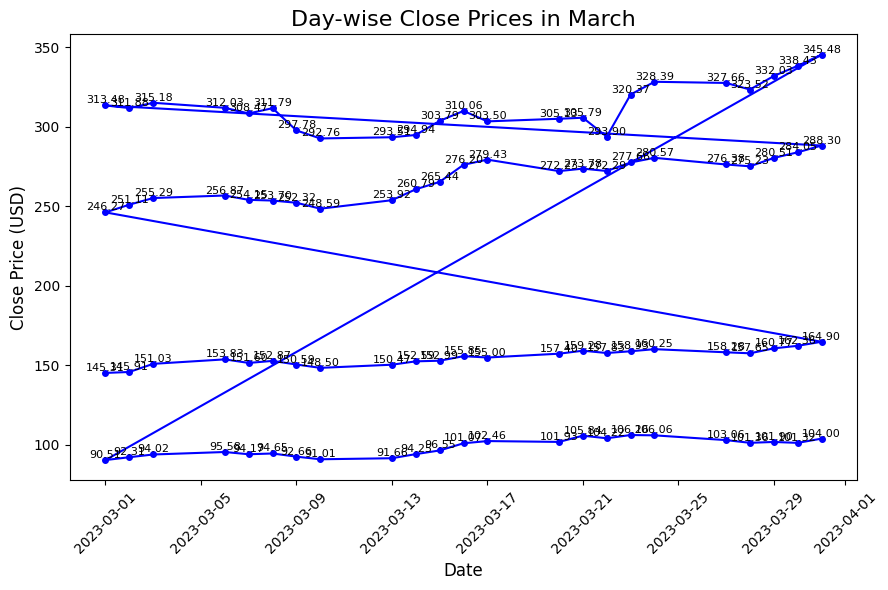

In [ ]:
# day wise close in month 3
import matplotlib.pyplot as plt

# Plot day-wise close in March (Month 3)
plt.figure(figsize=(9, 6))
plt.plot(df[df['Month'] == 3]['Date'], df[df['Month'] == 3]['Close'], color='blue', marker='o', markersize=4)

# Adding labels for each point
for i, row in df[df['Month'] == 3].iterrows():
    plt.text(row['Date'], row['Close'], f"{row['Close']:.2f}", color='black', fontsize=8, ha='center', va='bottom')

# Add title and labels
plt.title("Day-wise Close Prices in March", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
